# Import Libraries

In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Read Data

In [2]:
#Read the Dataset
df=pd.read_csv('healthcare_census.csv')
df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Summary Level,State,State FIPS,Insured Males 18-25,Noninsured Males 18-25,Females 18-25 with Insurance,Females 18-25 without insurance
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,"32,963.07","5,777.24","4,763.73",40,AL,1,"1,73,849","58,849","1,88,498","48,144"
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,20017,ALASKA REGIONAL HOSPITAL,2801 DEBARR ROAD,ANCHORAGE,AK,99508,AK - Anchorage,23,"34,805.13","8,401.95","6,413.78",40,AK,2,"26,917","12,275","25,692","8,152"
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30002,BANNER GOOD SAMARITAN MEDICAL CENTER,1111 EAST MCDOWELL ROAD,PHOENIX,AZ,85006,AZ - Phoenix,11,"34,803.81","7,768.90","6,951.45",40,AZ,4,"2,33,098","92,136","2,45,929","72,752"
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40004,WASHINGTON REGIONAL MED CTR AT NORTH HILLS,3215 N NORTH HILLS BLVD,FAYETTEVILLE,AR,72703,AR - Springdale,39,"30,470.56","5,811.56","4,372.61",40,AR,5,"1,01,489","40,199","1,05,642","34,898"
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50006,ST JOSEPH HOSPITAL,2700 DOLBEER ST,EUREKA,CA,95501,CA - Redding,48,"44,664.45","8,227.14","6,936.52",40,CA,6,"14,58,114","5,15,578","15,11,793","4,03,457"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163060,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50036,BAKERSFIELD MEMORIAL HOSPITAL,420 34TH ST BOX 1888,BAKERSFIELD,CA,93301,CA - Bakersfield,21,"53,334.80","8,012.23","6,213.19",40,CA,6,"14,58,114","5,15,578","15,11,793","4,03,457"
163061,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50026,GROSSMONT HOSPITAL,5555 GROSSMONT CENTER DRIVE BOX 58,LA MESA,CA,91942,CA - San Diego,26,"40,062.46","7,449.80","6,358.07",40,CA,6,"14,58,114","5,15,578","15,11,793","4,03,457"
163062,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50017,MERCY GENERAL HOSPITAL,4001 J ST,SACRAMENTO,CA,95819,CA - Sacramento,27,"66,207.66","10,863.22","6,924.70",40,CA,6,"14,58,114","5,15,578","15,11,793","4,03,457"
163063,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50013,ST HELENA HOSPITAL,10 WOODLAND ROAD,SAINT HELENA,CA,94574,CA - Napa,17,"1,05,929.47","9,438.00","8,376.35",40,CA,6,"14,58,114","5,15,578","15,11,793","4,03,457"


# Data Cleaning 

In [3]:
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments', 'Summary Level', 'State', 'State FIPS',
       'Insured Males 18-25', 'Noninsured Males 18-25',
       'Females 18-25 with Insurance', 'Females 18-25 without insurance'],
      dtype='object')

## Convert Str Type Numerical Columns into Float

In [4]:
col=['Total Discharges','Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments','Insured Males 18-25', 'Noninsured Males 18-25',
       'Females 18-25 with Insurance', 'Females 18-25 without insurance']
for i in col:
    df[i] = [float(str(j).replace(",", "")) for j in df[i]]
        

In [5]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Summary Level,State,State FIPS,Insured Males 18-25,Noninsured Males 18-25,Females 18-25 with Insurance,Females 18-25 without insurance
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91.0,32963.07,5777.24,4763.73,40,AL,1,173849.0,58849.0,188498.0,48144.0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,20017,ALASKA REGIONAL HOSPITAL,2801 DEBARR ROAD,ANCHORAGE,AK,99508,AK - Anchorage,23.0,34805.13,8401.95,6413.78,40,AK,2,26917.0,12275.0,25692.0,8152.0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30002,BANNER GOOD SAMARITAN MEDICAL CENTER,1111 EAST MCDOWELL ROAD,PHOENIX,AZ,85006,AZ - Phoenix,11.0,34803.81,7768.90,6951.45,40,AZ,4,233098.0,92136.0,245929.0,72752.0
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40004,WASHINGTON REGIONAL MED CTR AT NORTH HILLS,3215 N NORTH HILLS BLVD,FAYETTEVILLE,AR,72703,AR - Springdale,39.0,30470.56,5811.56,4372.61,40,AR,5,101489.0,40199.0,105642.0,34898.0
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50006,ST JOSEPH HOSPITAL,2700 DOLBEER ST,EUREKA,CA,95501,CA - Redding,48.0,44664.45,8227.14,6936.52,40,CA,6,1458114.0,515578.0,1511793.0,403457.0


In [6]:
# Cheking data type after conversion
df.dtypes

DRG Definition                           object
Provider Id                               int64
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider State                           object
Provider Zip Code                         int64
Hospital Referral Region Description     object
Total Discharges                        float64
Average Covered Charges                 float64
Average Total Payments                  float64
Average Medicare Payments               float64
Summary Level                             int64
State                                    object
State FIPS                                int64
Insured Males 18-25                     float64
Noninsured Males 18-25                  float64
Females 18-25 with Insurance            float64
Females 18-25 without insurance         float64
dtype: object

## Drop Unnecessary Columns

In [7]:
df.drop(['Provider State','Provider Zip Code','Provider Id','Provider Name','Provider Street Address','State FIPS','Provider City','Summary Level'], inplace=True, axis=1)

In [8]:
df

,DRG Definition,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,State,Insured Males 18-25,Noninsured Males 18-25,Females 18-25 with Insurance,Females 18-25 without insurance
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Dothan,91.0,32963.07,5777.24,4763.73,AL,173849.0,58849.0,188498.0,48144.0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK - Anchorage,23.0,34805.13,8401.95,6413.78,AK,26917.0,12275.0,25692.0,8152.0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AZ - Phoenix,11.0,34803.81,7768.90,6951.45,AZ,233098.0,92136.0,245929.0,72752.0
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AR - Springdale,39.0,30470.56,5811.56,4372.61,AR,101489.0,40199.0,105642.0,34898.0
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA - Redding,48.0,44664.45,8227.14,6936.52,CA,1458114.0,515578.0,1511793.0,403457.0
...,...,...,...,...,...,...,...,...,...,...,...
163060,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA - Bakersfield,21.0,53334.80,8012.23,6213.19,CA,1458114.0,515578.0,1511793.0,403457.0
163061,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA - San Diego,26.0,40062.46,7449.80,6358.07,CA,1458114.0,515578.0,1511793.0,403457.0
163062,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA - Sacramento,27.0,66207.66,10863.22,6924.70,CA,1458114.0,515578.0,1511793.0,403457.0
163063,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA - Napa,17.0,105929.47,9438.00,8376.35,CA,1458114.0,515578.0,1511793.0,403457.0


## Correlation between Independant Variables 

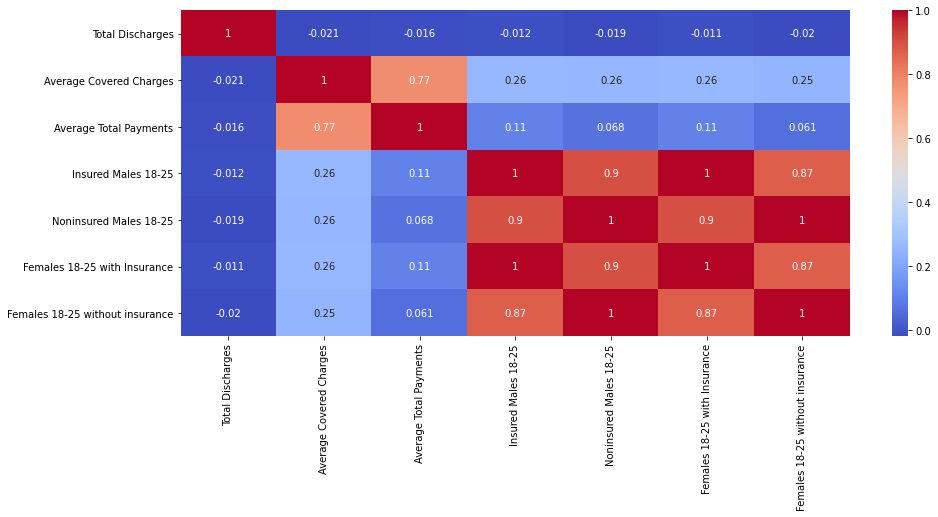

In [9]:
#Visualising the data using heatmap before standardize data
plt.figure(figsize=(15,6))
sns.heatmap(df.drop(['Average Medicare Payments'],axis=1).corr(),cmap='coolwarm',annot = True)
plt.show()

The heatmap shows ,strong correlation between all independant variables. 

## Onehot Encoding 

In [10]:
# One Hot Encoding 
df_new = pd.get_dummies(df)
df_new

,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Insured Males 18-25,Noninsured Males 18-25,Females 18-25 with Insurance,Females 18-25 without insurance,DRG Definition_039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,DRG Definition_057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,91.0,32963.07,5777.24,4763.73,173849.0,58849.0,188498.0,48144.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,23.0,34805.13,8401.95,6413.78,26917.0,12275.0,25692.0,8152.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,11.0,34803.81,7768.90,6951.45,233098.0,92136.0,245929.0,72752.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,39.0,30470.56,5811.56,4372.61,101489.0,40199.0,105642.0,34898.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,48.0,44664.45,8227.14,6936.52,1458114.0,515578.0,1511793.0,403457.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163060,21.0,53334.80,8012.23,6213.19,1458114.0,515578.0,1511793.0,403457.0,1,0,...,0,0,0,0,0,0,0,0,0,0
163061,26.0,40062.46,7449.80,6358.07,1458114.0,515578.0,1511793.0,403457.0,1,0,...,0,0,0,0,0,0,0,0,0,0
163062,27.0,66207.66,10863.22,6924.70,1458114.0,515578.0,1511793.0,403457.0,1,0,...,0,0,0,0,0,0,0,0,0,0
163063,17.0,105929.47,9438.00,8376.35,1458114.0,515578.0,1511793.0,403457.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_new.columns

Index(['Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments', 'Insured Males 18-25',
       'Noninsured Males 18-25', 'Females 18-25 with Insurance',
       'Females 18-25 without insurance',
       'DRG Definition_039 - EXTRACRANIAL PROCEDURES W/O CC/MCC',
       'DRG Definition_057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC',
       ...
       'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT',
       'State_WA', 'State_WI', 'State_WV', 'State_WY'],
      dtype='object', length=465)

In [12]:
df_new.describe()

,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Insured Males 18-25,Noninsured Males 18-25,Females 18-25 with Insurance,Females 18-25 without insurance,DRG Definition_039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,DRG Definition_057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
count,163065.000000,163065.000000,163065.000000,163065.000000,1.630650e+05,163065.000000,1.630650e+05,163065.000000,163065.000000,163065.000000,...,163065.000000,163065.00000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,42.776304,36133.954224,9707.473804,8494.490964,4.584118e+05,157608.468844,4.820515e+05,125722.334180,0.006617,0.007365,...,0.002980,0.02556,0.072756,0.004489,0.026566,0.001656,0.017036,0.017380,0.009745,0.001515
std,51.104042,35065.365931,7664.642598,7309.467261,3.726611e+05,159069.327969,3.869725e+05,131810.459609,0.081076,0.085504,...,0.054512,0.15782,0.259737,0.066850,0.160812,0.040658,0.129406,0.130681,0.098233,0.038890
min,11.000000,2459.400000,2673.000000,1148.900000,2.268100e+04,3406.000000,2.149700e+04,2042.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,15947.160000,5234.500000,4192.350000,2.172540e+05,58477.000000,2.227930e+05,48006.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,25245.820000,7214.100000,6158.460000,3.322220e+05,94184.000000,3.650870e+05,69359.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,43232.590000,11286.400000,10056.880000,5.804890e+05,159157.000000,6.248790e+05,127014.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3383.000000,929118.900000,156158.180000,154620.810000,1.458114e+06,515578.000000,1.511793e+06,418602.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Standardization of Data

In [13]:
#spliting data into x and y
X=df_new.drop(['Average Medicare Payments'],axis=1).values
Y=df_new['Average Medicare Payments'].values

In [14]:
X

array([[9.1000000e+01, 3.2963070e+04, 5.7772400e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.3000000e+01, 3.4805130e+04, 8.4019500e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1000000e+01, 3.4803810e+04, 7.7689000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.7000000e+01, 6.6207660e+04, 1.0863220e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.7000000e+01, 1.0592947e+05, 9.4380000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6000000e+01, 5.1950870e+04, 7.8630000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [15]:
Y

array([4763.73, 6413.78, 6951.45, ..., 6924.7 , 8376.35, 6872.5 ])

In [16]:
#from sklearn.preprocessing import StandardScaler
# Standardizing the features
std_x = StandardScaler().fit_transform(X)

## Apply PCA

In [17]:
#from sklearn.decomposition import PCA
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(std_x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5', 'principal component 6','principal component 7', 'principal component 8'])

In [18]:
pca.explained_variance_ratio_

array([0.0128106 , 0.00577204, 0.00474729, 0.00438229, 0.00436926,
       0.0043441 , 0.00432863, 0.00432505])

In [19]:
x1 = principalDf
x1

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,-1.725651,-0.951441,0.314920,1.020132,-2.106400,1.711846,0.747128,0.062236
1,-2.512802,0.361186,-2.182996,-1.675585,3.300560,5.014905,0.730507,1.318446
2,-1.278195,0.357492,-0.048566,-1.209123,0.228529,0.733075,-0.361734,0.720930
3,-2.157087,-0.498309,-0.235125,1.226657,0.677198,-0.784653,-1.082569,1.294170
4,5.972598,-0.288572,-1.435417,1.634590,-0.600151,0.332999,-1.064176,0.228350
...,...,...,...,...,...,...,...,...
163060,6.003507,-0.340285,-1.398432,1.637977,-0.595929,0.296534,-1.003077,0.217953
163061,5.949080,-0.531860,-1.451061,1.658306,-0.591765,0.321308,-1.045646,0.221131
163062,6.101651,0.193118,-1.295853,1.634430,-0.587747,0.260253,-0.998406,0.255318
163063,6.253247,0.661150,-1.197468,1.636550,-0.557937,0.277471,-0.918132,0.212744


In [20]:
y1 =df_new['Average Medicare Payments']
y1

0         4763.73
1         6413.78
2         6951.45
3         4372.61
4         6936.52
           ...   
163060    6213.19
163061    6358.07
163062    6924.70
163063    8376.35
163064    6872.50
Name: Average Medicare Payments, Length: 163065, dtype: float64

### Ploting boxplot 

In [21]:
finalDf = pd.concat([x1,y1], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,Average Medicare Payments
0,-1.725651,-0.951441,0.314920,1.020132,-2.106400,1.711846,0.747128,0.062236,4763.73
1,-2.512802,0.361186,-2.182996,-1.675585,3.300560,5.014905,0.730507,1.318446,6413.78
2,-1.278195,0.357492,-0.048566,-1.209123,0.228529,0.733075,-0.361734,0.720930,6951.45
3,-2.157087,-0.498309,-0.235125,1.226657,0.677198,-0.784653,-1.082569,1.294170,4372.61
4,5.972598,-0.288572,-1.435417,1.634590,-0.600151,0.332999,-1.064176,0.228350,6936.52
...,...,...,...,...,...,...,...,...,...
163060,6.003507,-0.340285,-1.398432,1.637977,-0.595929,0.296534,-1.003077,0.217953,6213.19
163061,5.949080,-0.531860,-1.451061,1.658306,-0.591765,0.321308,-1.045646,0.221131,6358.07
163062,6.101651,0.193118,-1.295853,1.634430,-0.587747,0.260253,-0.998406,0.255318,6924.70
163063,6.253247,0.661150,-1.197468,1.636550,-0.557937,0.277471,-0.918132,0.212744,8376.35


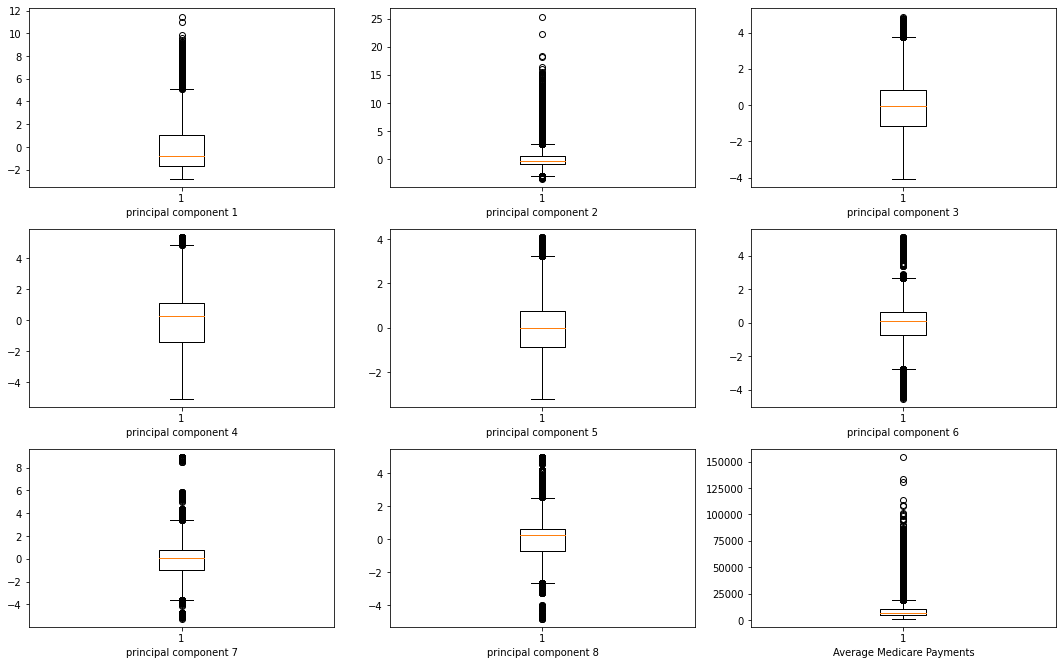

In [22]:
# ploting boxplot for all col of df
plt.figure(figsize=(15, 15))

for i, col in enumerate(finalDf.columns,1):
    plt.subplot(5,3, i)
    plt.boxplot(finalDf[col])
    plt.xlabel(col)
plt.tight_layout()

### Pairplots After PCA

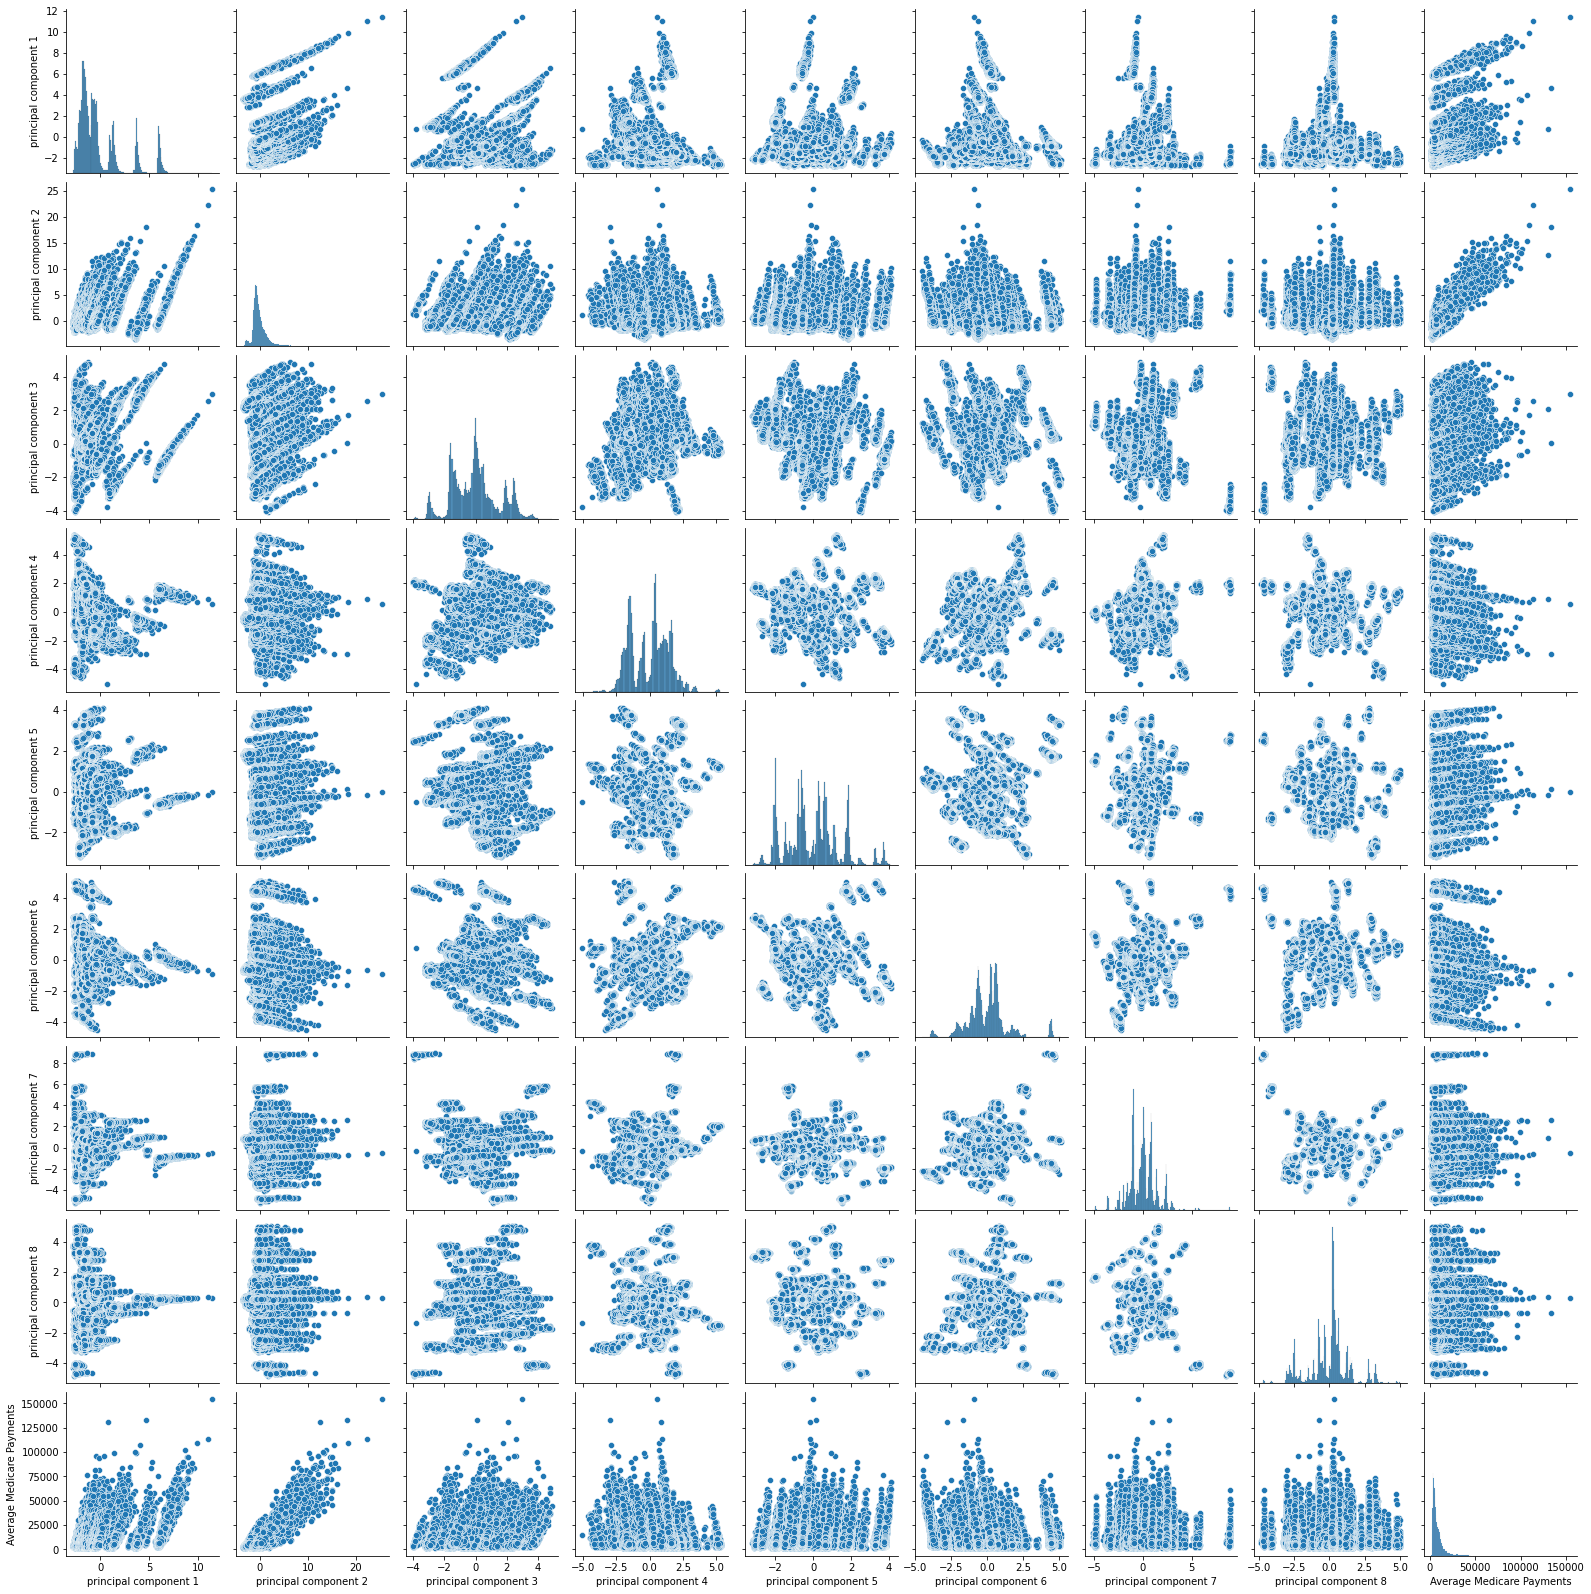

In [23]:
sns.pairplot(finalDf)

## Split data in Training and testing 

In [24]:
import sklearn

In [25]:
# Split data in Training and testing 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3)#, random_state=0)

## Heatmap 

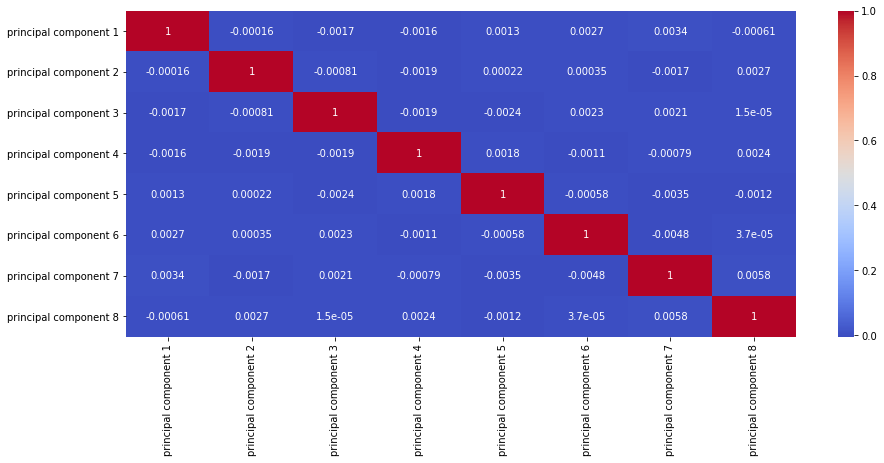

In [26]:
#Visualising the data using heatmap
plt.figure(figsize=(15,6))
sns.heatmap(X_train.corr(),cmap='coolwarm',annot = True)
plt.show()

The above heatmap shows, no correlation between independant variables.

# Model Building

## Apply Regression Analysis

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from yellowbrick.regressor import prediction_error
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


### Why prediction error plot?

A prediction error plot shows the actual targets from the dataset against the predicted values 
generated by our model. This allows us to see how much variance is in the model. Data scientists 
can diagnose regression models using this plot by comparing against the 45 degree line, where 
the prediction exactly matches the model.

bestfitbool, default: True
Draw a linear best fit line to estimate the correlation between the predicted and measured value 
of the target variable.

identitybool, default: True
Draw the 45 degree identity line, y=x in order to better show the relationship or pattern of the residuals.

Returns :R2 score in float value.

Import:

!pip install yellowbrick
!pip install -U yellowbrick

## LinearRegression

In [48]:
#from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# fit the model using the training data and training targets
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# calculate R2 score,RMSE,MAE
print("Root Mean squared error: ", mean_squared_error(y_test, y_pred) ** 0.5)
print("Mean Absolute error: ", mean_absolute_error(y_test, y_pred))
print("R-squared score : ", r2_score(y_test, y_pred))

#display adjusted R-squared
print("adjusted R-sqr : ", 1 - (1-lr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))


Root Mean squared error:  3150.5971302115618
Mean Absolute error:  2187.429320863546
R-squared score :  0.8188360303070529
adjusted R-sqr :  0.8152500937574381


In [49]:
#Test data
res = pd.DataFrame({"Actual ":y_test,"Predicted ":y_pred})
res

,Actual,Predicted
120642,2192.78,2506.456237
124498,22356.52,17354.217614
42379,4612.45,9329.270397
12668,12903.15,16892.967787
78440,3654.75,3851.886657
...,...,...
47338,7923.80,7215.272910
50580,27597.41,17803.503028
26294,6443.48,4272.598711
131129,4812.35,3520.808795


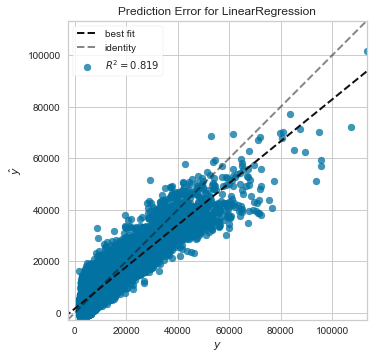

In [50]:
# Instantiate the linear model and visualizer
visualizer = prediction_error(lr, X_train, y_train, X_test, y_test)

Above graph shows prediction error. It shows, bestfit line and identity line.
In This plot identity line is bit far from bestfit line. Hence Linear regression model is not so good.

## Decision Tree (Regressor)

In [31]:
#from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(random_state=7)  

# fit the model using the training data and training targets
DT.fit(X_train,y_train)

y_pred = DT.predict(X_test)

# calculate R2 score,RMSE,MAE
print("Root Mean squared error: ", mean_squared_error(y_test, y_pred) ** 0.5)
print("Mean Absolute error: ", mean_absolute_error(y_test, y_pred))
print("R-squared score : ", r2_score(y_test, y_pred))

#display adjusted R-squared
print("adjusted R-sqr : ", 1 - (1-DT.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))


Root Mean squared error:  2087.7882568707337
Mean Absolute error:  1216.7071375715452
R-squared score :  0.920446556450331
adjusted R-sqr :  1.0


In [32]:
#Test Data
res = pd.DataFrame({"Actual ":y_test,"Predicted ":y_pred})
res

,Actual,Predicted
120642,2192.78,2539.33
124498,22356.52,18829.40
42379,4612.45,6472.10
12668,12903.15,16268.88
78440,3654.75,3794.61
...,...,...
47338,7923.80,5901.08
50580,27597.41,29237.08
26294,6443.48,6096.18
131129,4812.35,3084.02


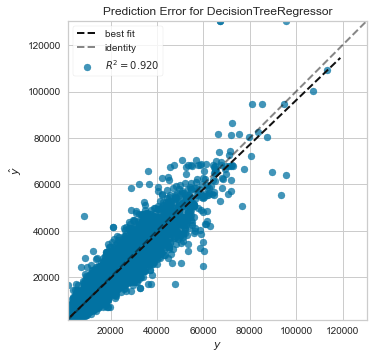

In [33]:
visualizer = prediction_error(DT, X_train, y_train, X_test, y_test)

In This plot identity line is closer to bestfit line. Hence Decision Tree regression model is good.

## RandomForestRegressor

In [34]:
#from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state=7)

# fit the model using the training data and training targets
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

# calculate R2 score,RMSE,MAE
print("Root Mean squared error: ", mean_squared_error(y_test, y_pred) ** 0.5)
print("Mean Absolute error: ", mean_absolute_error(y_test, y_pred))
print("R-squared score : ", r2_score(y_test, y_pred))


#display adjusted R-squared
print("adjusted R-sqr : ", 1 - (1-RF.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))


Root Mean squared error:  1450.351674007469
Mean Absolute error:  863.8011489656583
R-squared score :  0.9616087083973678
adjusted R-sqr :  0.994394280450591


In [35]:
#Test Data
res = pd.DataFrame({"Actual ":y_test,"Predicted ":y_pred})
res

,Actual,Predicted
120642,2192.78,2516.7205
124498,22356.52,18831.9168
42379,4612.45,6526.3678
12668,12903.15,18295.2371
78440,3654.75,3702.0812
...,...,...
47338,7923.80,5874.1390
50580,27597.41,24766.4978
26294,6443.48,6602.3067
131129,4812.35,3670.3779


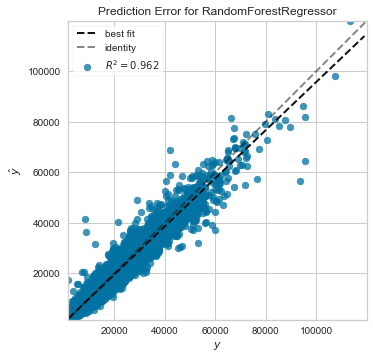

In [36]:
visualizer = prediction_error(RF, X_train, y_train, X_test, y_test)

In This plot identity line is very close to bestfit line. Hence Random Forest regression model is good.

## XGBOOST

!pip install xgboost

In [37]:
#from xgboost import XGBRegressor

XG = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
# fit the model using the training data and training targets
XG.fit(X_train, y_train, verbose=False)

y_pred = XG.predict(X_test)

# calculate R2 score,RMSE,MAE
print("Root Mean squared error: ", mean_squared_error(y_test, y_pred) ** 0.5)
print("Mean Absolute error: ", mean_absolute_error(y_test, y_pred))
print("R-squared score : ", r2_score(y_test, y_pred))


#display adjusted R-squared
print("adjusted R-sqr : ", 1 - (1-XG.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))



Root Mean squared error:  1561.9756413962339
Mean Absolute error:  994.8673173648463
R-squared score :  0.9554718557352753
adjusted R-sqr :  0.9688356232113803


In [38]:
#Test Data
res = pd.DataFrame({"Actual ":y_test,"Predicted ":y_pred})
res

,Actual,Predicted
120642,2192.78,2775.002197
124498,22356.52,19820.986328
42379,4612.45,5816.656250
12668,12903.15,18218.123047
78440,3654.75,4101.179199
...,...,...
47338,7923.80,5854.672852
50580,27597.41,22923.628906
26294,6443.48,5992.038086
131129,4812.35,3688.538086


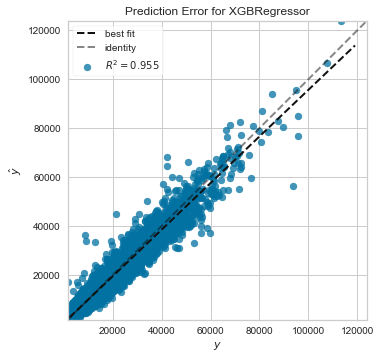

In [39]:
visualizer = prediction_error(XG, X_train, y_train, X_test, y_test)

In This plot identity line is very close to bestfit line. Hence XGBoost regression model is Best.

## KNeighborsRegressor

In [40]:
#from sklearn.neighbors import KNeighborsRegressor

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

# calculate R2 score,RMSE,MAE
print("Root Mean squared error: ", mean_squared_error(y_test, y_pred) ** 0.5)
print("Mean Absolute error: ", mean_absolute_error(y_test, y_pred))
print("R-squared score : ", r2_score(y_test, y_pred))

#display adjusted R-squared
print("adjusted R-sqr : ", 1 - (1-reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))


Root Mean squared error:  1609.7615802896314
Mean Absolute error:  944.6750855819024
R-squared score :  0.9527056568337127
adjusted R-sqr :  0.9776117078629895


In [41]:
#Test Data
res = pd.DataFrame({"Actual ":y_test,"Predicted ":y_pred})
res

,Actual,Predicted
120642,2192.78,2251.900000
124498,22356.52,18810.486667
42379,4612.45,5465.896667
12668,12903.15,19484.913333
78440,3654.75,3781.703333
...,...,...
47338,7923.80,5463.850000
50580,27597.41,23900.886667
26294,6443.48,6585.496667
131129,4812.35,3639.073333


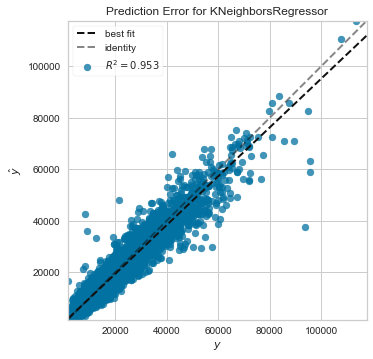

In [42]:
visualizer = prediction_error(reg, X_train, y_train, X_test, y_test)

In This plot identity line is very close to bestfit line. Hence KNeighbors regression model is Best.

# Conclusion:

We applied 5 regression model as follows:
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor
4. XGBoost Regressor
5. KNeighbors Regressor

All model gives R2 score and Root Mean Square Error. From that we conclude,
Random forest regression model is best fit model beacause,it gives 
high R2 score and less RMSE.

# Testing model

## Random Forest Regressor on  Test Dataset

In [43]:
#from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state=7)

# fit the model using the training data and training targets
RF.fit(X_test, y_test)

y_pred = RF.predict(X_train)

# calculate R2 score,RMSE,MAE
print("Root Mean squared error: ", mean_squared_error(y_train, y_pred) ** 0.5)
print("Mean Absolute error: ", mean_absolute_error(y_train, y_pred))
print("R-squared score : ", r2_score(y_train, y_pred))

#display adjusted R-squared
print("adjusted R-sqr : ", 1 - (1-RF.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))


Root Mean squared error:  1551.6068320564964
Mean Absolute error:  930.9536744552983
R-squared score :  0.9544408644759971
adjusted R-sqr :  0.9936007075988535


In [44]:
#Test Data
res = pd.DataFrame({"Actual ":y_train,"Predicted ":y_pred})
res

,Actual,Predicted
81139,8873.94,11330.6386
79564,3648.27,3910.1818
86350,5393.28,5739.1441
103973,5025.27,5249.2410
83453,4553.30,3364.3680
...,...,...
68367,11494.36,11495.8813
14757,5154.10,4848.1021
54117,9290.96,8190.5447
143050,32296.18,37692.4782


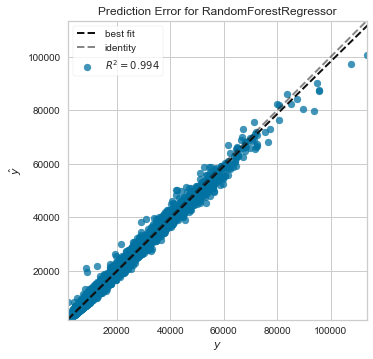

In [45]:
visualizer = prediction_error(RF, X_train, y_train, X_test, y_test)

Random forest regression model on Test dataset, The R2 score is much more stable i.e. 0.95 and the RMSE is also less i.e. 1545.85 .It is giving similar output as Train Dataset. 
In the Prediction error graph, we can see identity line is much more closer to best fit line.

Random forest regression model is best fit on This dataset. 

In [46]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % RF.score(X_test, y_test))

Variance score: 0.9936
